In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# using sklearn function

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.datasets import load_breast_cancer
bc=load_breast_cancer()
X=bc['data']
df=pd.DataFrame(X,columns=bc['feature_names'])
df['target']=bc['target']

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
np.sqrt(np.sum((df.iloc[0]-df.iloc[1])**2))

341.7302620944424

In [10]:
df.shape

(569, 31)

In [11]:
sc=StandardScaler()
df_new=sc.fit_transform(df.iloc[:,:-1])
df_new=pd.DataFrame(df_new,columns=bc['feature_names'])
df_new['target']=bc['target']

In [12]:
df_new.shape

(569, 31)

In [13]:
df_new.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(df_new.iloc[:,:-1],df_new.iloc[:,-1],test_size=0.2,random_state=42)

In [15]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

# getting best accuracy at K=9

0.9649122807017544


# selecting the most important 2 features as we have to visualize the decision boundary

In [16]:
# selecting only the 2 most important features from the dataset
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_reduced=pca.fit_transform(df_new.iloc[:,:-1])
df_reduced=pd.DataFrame(df_reduced,columns=['PC1','PC2'])
df_reduced['target']=bc['target']

In [17]:
df_reduced.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(df_reduced.iloc[:,:-1],df_reduced.iloc[:,-1],test_size=0.2,random_state=42)

# plotting decision boundary

# बड़ा टाइम लेता है जी😒


In [19]:
# # Step 1: Train the k-NN classifier
# knn = KNeighborsClassifier(n_neighbors=5)  # Example: k=5
# knn.fit(X_train, Y_train)

# # Step 2: Create a mesh grid for the decision surface
# x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
# y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# # Step 3: Predict class for each point on the grid
# Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])  # Flatten the grid for prediction
# Z = Z.reshape(xx.shape)  # Reshape to the grid's shape

# # Step 4: Plot the decision surface
# plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

# # Step 5: Plot the training and test points
# plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolor='k', cmap=plt.cm.coolwarm, label='Training Data')
# plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=Y_test, edgecolor='k', cmap=plt.cm.coolwarm, marker='x', label='Test Data')

# plt.title("k-NN Decision Surface (k=5)")
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# plt.legend()
# plt.show()

In [20]:
accuracies=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracies.append(accuracy_score(Y_test,Y_pred))

    

Text(0.5, 1.0, 'accuracy vs k')

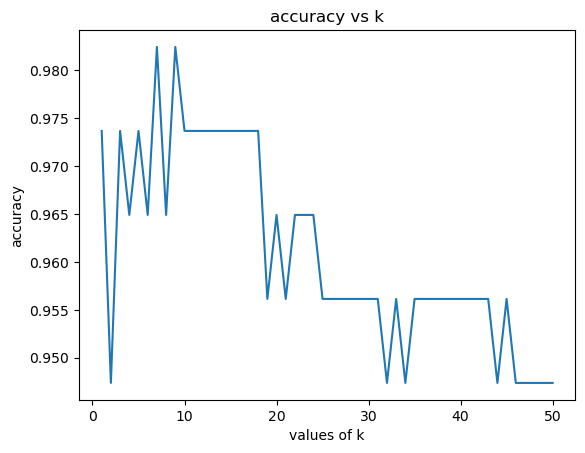

In [21]:
plt.plot(range(1,51),accuracies)
plt.xlabel("values of k")
plt.ylabel("accuracy")
plt.title("accuracy vs k")

# FROM SCRATCH

In [22]:
class myKNN():
    
    def __init__(self,k):
        self.k=k
        self.X_train=None
        self.Y_train=None
    
    def fit(self,X_train,Y_train):
        self.X_train=X_train
        self.Y_train=Y_train
         
    
    def predict(self,X_test):
        
        predictions=[]
        for i in range(X_test.shape[0]):
            distances=np.sqrt(np.sum((X_test.iloc[i].values-self.X_train.values)**2,axis=1))
            
            k_indices=np.argsort(distances)[:self.k]
           
            
            count0=0
            count1=0
            
            for index in k_indices:
                if(self.Y_train.iloc[index]==0):
                    count0+=1
                else:
                    count1+=1
            if count0>count1:
                predictions.append(0)
            else:
                predictions.append(1)
                
        return np.array(predictions)
            
            
                
            
          
            
        
            
       
        
    
    

In [23]:
from sklearn.datasets import load_breast_cancer

bc=load_breast_cancer()
X=bc['data']
df=pd.DataFrame(X,columns=bc['feature_names'])
df['target']=bc['target']


sc=StandardScaler()
df_new=sc.fit_transform(df.iloc[:,:-1])
df_new=pd.DataFrame(df_new,columns=bc['feature_names'])
df_new['target']=bc['target']


X_train,X_test,Y_train,Y_test=train_test_split(df_new.iloc[:,:-1],df_new.iloc[:,-1],test_size=0.2,random_state=42)

In [24]:
mknn=myKNN(k=9)
mknn.fit(X_train,Y_train)
Y_pred=mknn.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

0.9649122807017544


In [25]:
accuracies=[]
for i in range(1,51):
    knn=myKNN(k=i)
    knn.fit(X_train,Y_train)
    Y_pred=knn.predict(X_test)
    accuracies.append(accuracy_score(Y_test,Y_pred))

    

Text(0.5, 1.0, 'accuracy vs k')

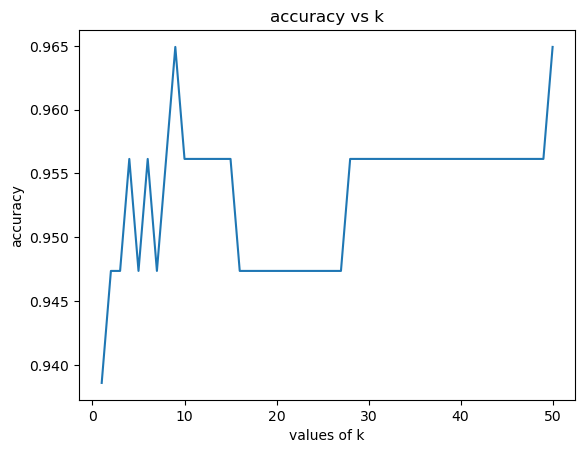

In [26]:
plt.plot(range(1,51),accuracies)
plt.xlabel("values of k")
plt.ylabel("accuracy")
plt.title("accuracy vs k")